# Product Detection (Shopee Code League 2020)

In [29]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.plotting.register_matplotlib_converters()
import cv2 
import seaborn as sns
%matplotlib inline

print(tf.__version__)
ds_path = "./data/train/train"

2.0.0


## Data Exploration

### Read dataset and images

In [30]:
d_train = pd.read_csv("./data/train.csv")

In [31]:
d_train.shape

(105392, 2)

In [32]:
d_train.columns

Index(['filename', 'category'], dtype='object')

In [42]:
category = d_train.category.unique()
category = np.sort(category)
category

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

In [34]:
d_show = d_train.groupby("category", as_index=False).apply(lambda o: o.iloc[0, :])

In [35]:
len(d_show)

42

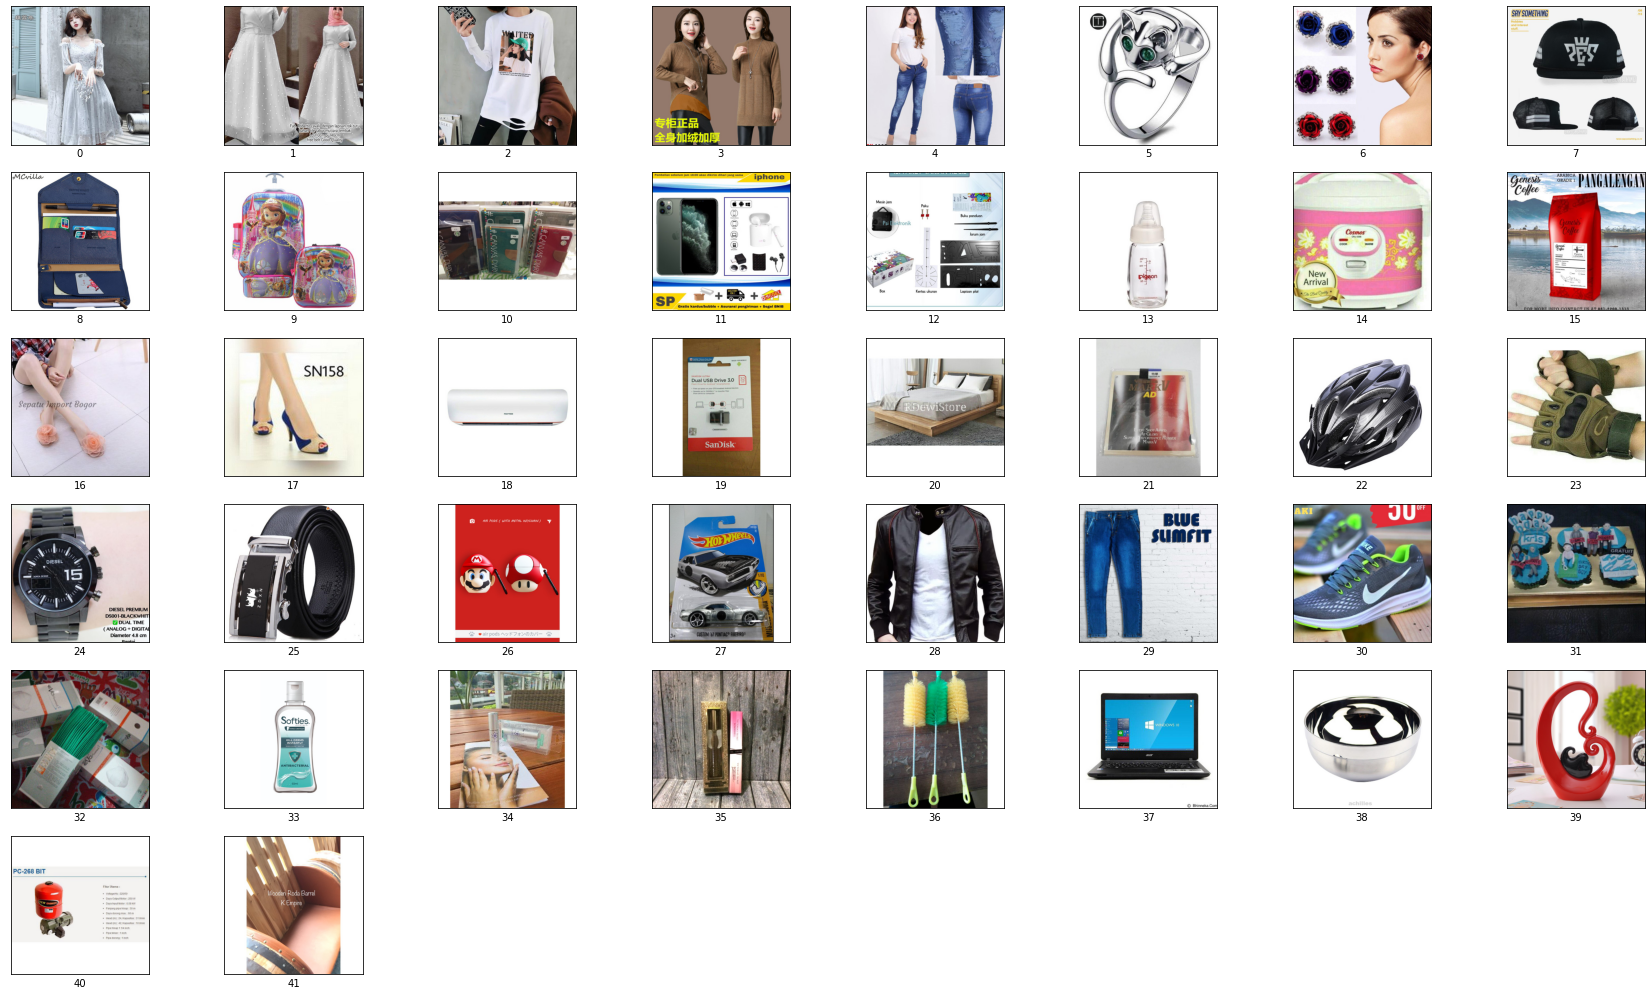

In [36]:
plt.figure(figsize=(30,30))
for i in range(len(d_show)):
    r = d_show.iloc[i]
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
  
    path = "%s/%02d/%s" % (ds_path, r.category, r.filename)
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    plt.xlabel(r.category)
plt.show()

In [9]:
d_d = d_train.groupby("category", as_index=False).count()

In [10]:
d_d

category  filename
0          0      2683
1          1      2702
2          2      2687
3          3      2703
4          4      2703
5          5      2641
6          6      2641
7          7      2660
8          8      2700
9          9      2698
10        10      2672
11        11      1843
12        12      2691
13        13      2682
14        14      2684
15        15      2632
16        16      2665
17        17      1553
18        18      2103
19        19      2679
20        20      2653
21        21      2598
22        22      2623
23        23      2540
24        24      2705
25        25      2692
26        26      2684
27        27      2702
28        28      2561
29        29      2138
30        30      2705
31        31      2677
32        32      2157
33        33       573
34        34      2599
35        35      2658
36        36      2686
37        37      1725
38        38      2673
39        39      2678
40        40      2681
41        41      2662

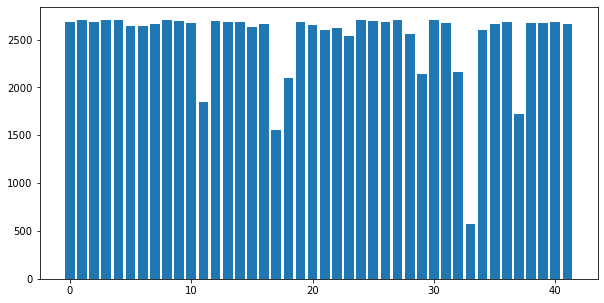

In [11]:
plt.figure(figsize=(10,5))
plt.bar(d_d.category, d_d.filename)
plt.show()

## Analyze and build Model

Select 200 images each category

In [38]:
CLASSIFICATION_SIZE = 500

d_reduced = d_train.groupby("category", as_index=False).apply(lambda o: o.sample(n=CLASSIFICATION_SIZE, random_state=1))

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Read images, resize to 200x200

In [44]:
X = []
y = []
IMG_HEIGHT = 200
IMG_WIDTH = 200
img_size = (200, 200)

i = 0
while i < len(d_reduced):
    r = d_reduced.iloc[i]
    path = "%s/%02d/%s" % (ds_path, r.category, r.filename)
    img = cv2.resize(cv2.imread(path), img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    X.append(img)
    y.append(r.category)
    i += 1

X = np.array(X)
y = np.array(y)

In [45]:
X = X / 255.0

Create train, test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Visualize

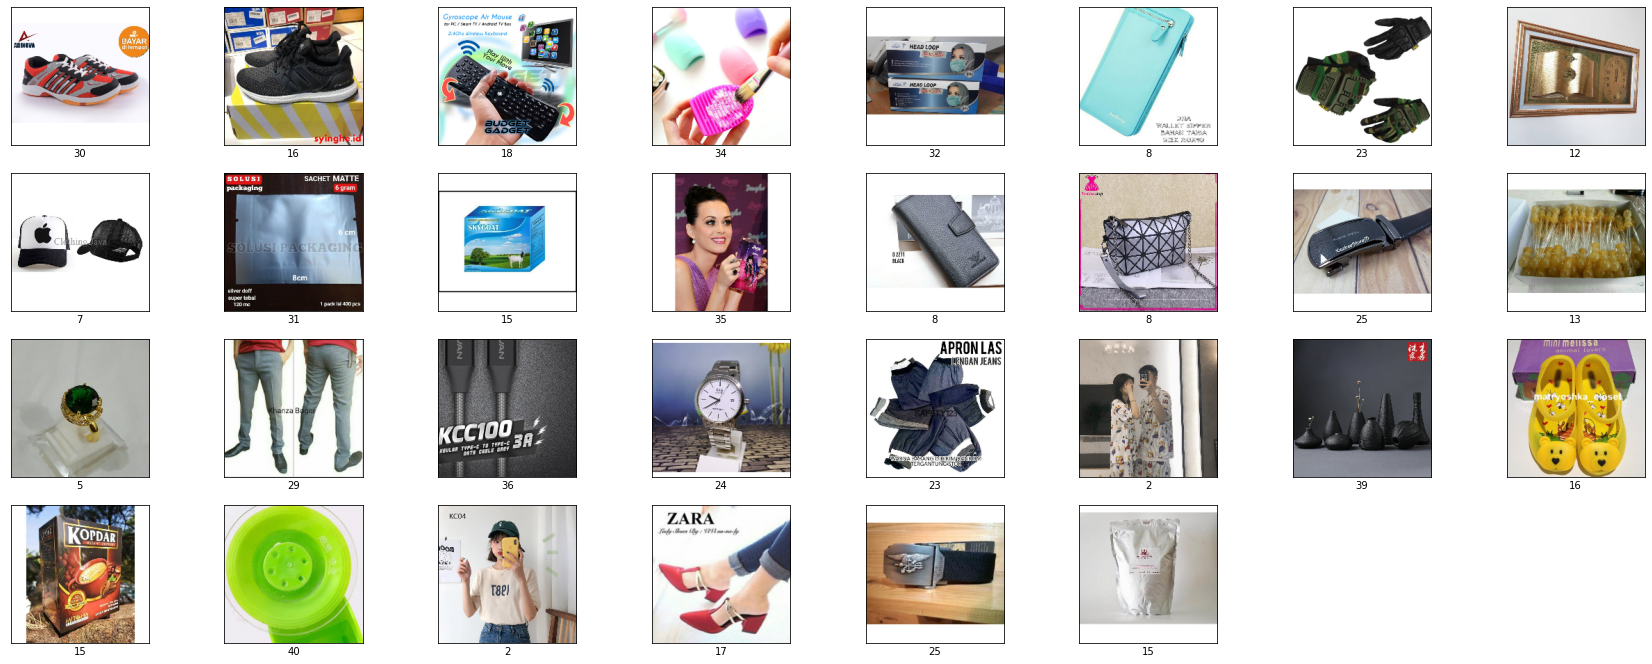

In [47]:
plt.figure(figsize=(30,30))
for i in range(30):
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plt.imshow(X_train[i], cv2.COLOR_GRAY2RGB))
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

Create layer for NN

In [48]:
img_size=(200, 200, 3)
model = keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=img_size))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(category)))

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train model

In [50]:
model.fit(X_train, y_train, epochs=2)

Train on 16800 samples
Epoch 1/2
16800/16800 [==============================] - 521s 31ms/sample - loss: 11.7074 - accuracy: 0.0238
Epoch 2/2
16800/16800 [==============================] - 595s 35ms/sample - loss: 11.7653 - accuracy: 0.0240


Test with validation set

In [51]:
model.evaluate(X_test,  y_test, verbose=2)

4200/1 - 40s - loss: 13.4135 - accuracy: 0.0229


[11.794040930611747, 0.022857143]

Load test set

In [28]:
predictions = model.predict(np.array([ X_test[0], X_test[1] ]))
predictions

array([[ -36.556984 ,  -20.821383 ,  -21.21215  ,  -32.887302 ,
         -15.414963 ,  -20.397284 ,  -36.3022   ,  -34.902126 ,
         -36.923332 ,  -52.556458 ,  -10.193509 ,  -17.937946 ,
         -15.995435 ,  -35.49359  ,   26.646381 ,  -35.812668 ,
         -20.521732 ,  -57.35781  ,  -72.2521   ,   53.274567 ,
         -10.041556 ,  -46.362404 ,  -27.609604 ,  -11.848131 ,
          66.18038  ,   -4.5070133,  -37.31604  ,   34.532303 ,
          77.010056 ,   -8.314245 ,  -16.52402  ,  -33.328728 ,
          22.003212 ,   30.651033 ,   38.404037 ,  -15.974317 ,
         -10.701112 ,  -15.151999 ,   22.289019 ,  -29.398466 ,
         -15.639743 ,   14.883113 ],
       [ -69.96233  ,  -38.931225 ,  -40.554653 ,  -61.59456  ,
         -28.443485 ,  -39.84863  ,  -69.445595 ,  -66.61338  ,
         -69.53201  ,  -99.32434  ,  -20.387651 ,  -32.336533 ,
         -31.355825 ,  -66.9819   ,   50.76559  ,  -67.11695  ,
         -36.839474 , -107.93996  , -137.14555  ,  100.85726  ,
   

In [52]:
d_test = pd.read_csv("./data/test.csv")

In [53]:
d_test.shape

(12186, 2)

In [54]:
test = []
IMG_HEIGHT = 200
IMG_WIDTH = 200
img_size = (200, 200)

i = 0
while i < len(d_test):
    r = d_test.iloc[i]
    path = "%s/%s" % ("./data/test/test", r.filename)
    img = cv2.resize(cv2.imread(path), img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    test.append(img)
    i += 1

test = np.array(test)

In [55]:
test = test / 255.0

In [57]:
predictions = model.predict(test)
predictions

array([[ 141.31241 ,  -64.19741 , -107.16113 , ..., -108.27439 ,
         -43.38434 ,   87.12965 ],
       [ 167.998   ,  -73.97905 , -123.5057  , ..., -127.264854,
         -51.856106,  102.990616],
       [ 152.15024 ,  -66.18416 , -110.646034, ..., -114.24449 ,
         -46.533386,   93.11994 ],
       ...,
       [ 222.54523 ,  -99.4171  , -165.9409  , ..., -169.45618 ,
         -68.54195 ,  137.36263 ],
       [ 174.97371 ,  -77.019936, -128.99509 , ..., -132.24483 ,
         -53.846912,  107.221016],
       [ 107.91079 ,  -48.109154,  -80.201164, ...,  -81.90672 ,
         -33.346054,   66.32757 ]], dtype=float32)

In [62]:
predictions.shape

(12186, 42)

In [65]:
predictions[2]

array([ 152.15024 ,  -66.18416 , -110.646034,  -72.67998 , -160.51799 ,
         50.72054 ,  -76.85713 ,   31.729046,   43.057606,   29.821299,
        -40.269295,  -22.427042,  -56.8877  ,   98.02232 , -197.3034  ,
         72.92629 ,   38.249172,   43.209316,  -68.34264 ,  -83.81609 ,
        -95.601685,  121.391975,   74.86749 ,  -32.68862 ,  -66.11377 ,
         37.231956,   62.72711 ,  -23.117075,  135.10428 ,  -10.14876 ,
        -68.82062 ,   66.236496,  -92.671074,  -11.024602,  -41.306114,
         88.999   ,   86.98752 ,  -15.829212,   41.61149 , -114.24449 ,
        -46.533386,   93.11994 ], dtype=float32)

In [60]:
predict_labels = np.argmax(predictions, axis=1)
predict_labels

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
set(predict_labels)

{0}

In [67]:
d_test.category = predict_labels
d_test.head(10)

filename  category
0  fd663cf2b6e1d7b02938c6aaae0a32d2.jpg         0
1  c7fd77508a8c355eaab0d4e10efd6b15.jpg         0
2  127f3e6d6e3491b2459812353f33a913.jpg         0
3  5ca4f2da11eda083064e6c36f37eeb81.jpg         0
4  46d681a542f2c71be017eef6aae23313.jpg         0
5  f27ffaf1ab259a0efe2c59611de6732b.jpg         0
6  5eb8d9688d86ec7277f10fc18f386913.jpg         0
7  2ff578b587ec0c086ded573a3a9a9e3a.jpg         0
8  936b60783f4f3d3f2b718cc28a1cd629.jpg         0
9  2ac0233cc59040fd847f0cd9528772cc.jpg         0

In [68]:
d_test.to_csv("./data/result.csv", index=False)

# Load and train dataset using `tf.Dataset`

In [41]:
import tensorflow as tf
from tensorflow import keras
AUTOTUNE = tf.data.experimental.AUTOTUNE
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import pathlib
tf.__version__

'2.0.0'

In [3]:
data_dir = pathlib.Path("./data/train/train")

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

105392

In [7]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"])
CLASS_NAMES

array(['03', '04', '32', '35', '34', '33', '05', '02', '20', '18', '27',
       '11', '29', '16', '28', '17', '10', '19', '26', '21', '07', '38',
       '00', '36', '09', '31', '30', '37', '08', '01', '06', '39', '41',
       '24', '23', '15', '12', '40', '13', '14', '22', '25'], dtype='<U2')

In [8]:
len(CLASS_NAMES)

42

In [12]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [9]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [10]:
for f in list_ds.take(5):
  print(f.numpy())

b'data/train/train/36/0eab156ed10656ccbdc86bd1475c42de.jpg'
b'data/train/train/08/432203fac5afa32ecd1c437261aad73c.jpg'
b'data/train/train/40/4242b124fc38adfce8cf4ec98540bc56.jpg'
b'data/train/train/23/c431181261a2742e0f269d4de7982737.jpg'
b'data/train/train/37/1ac16a6f2ac19dbc5adb6a0fc2e28613.jpg'


In [11]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [13]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [14]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [15]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [16]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


To train a model with this dataset you will want the data:

* To be well shuffled.
* To be batched.
* Batches to be available as soon as possible.

These features can be easily added using the `tf.data` api.

In [17]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [21]:
train_ds = prepare_for_training(labeled_ds)

In [22]:
train_ds

<DatasetV1Adapter shapes: ((None, 224, 224, 3), (None, 42)), types: (tf.float32, tf.bool)>

In [23]:
image_batch, label_batch = next(iter(train_ds))

Create layer for NN

In [51]:
model = keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(CLASS_NAMES)))
model.add(Dense(1))

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train model

In [53]:
model.fit(train_ds, steps_per_epoch=STEPS_PER_EPOCH)

Train for 3294.0 steps
